<h1>IRIS Classifier</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white",color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("iris.csv")
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# dropping the unwanted column
df = df.drop(["Id"],axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


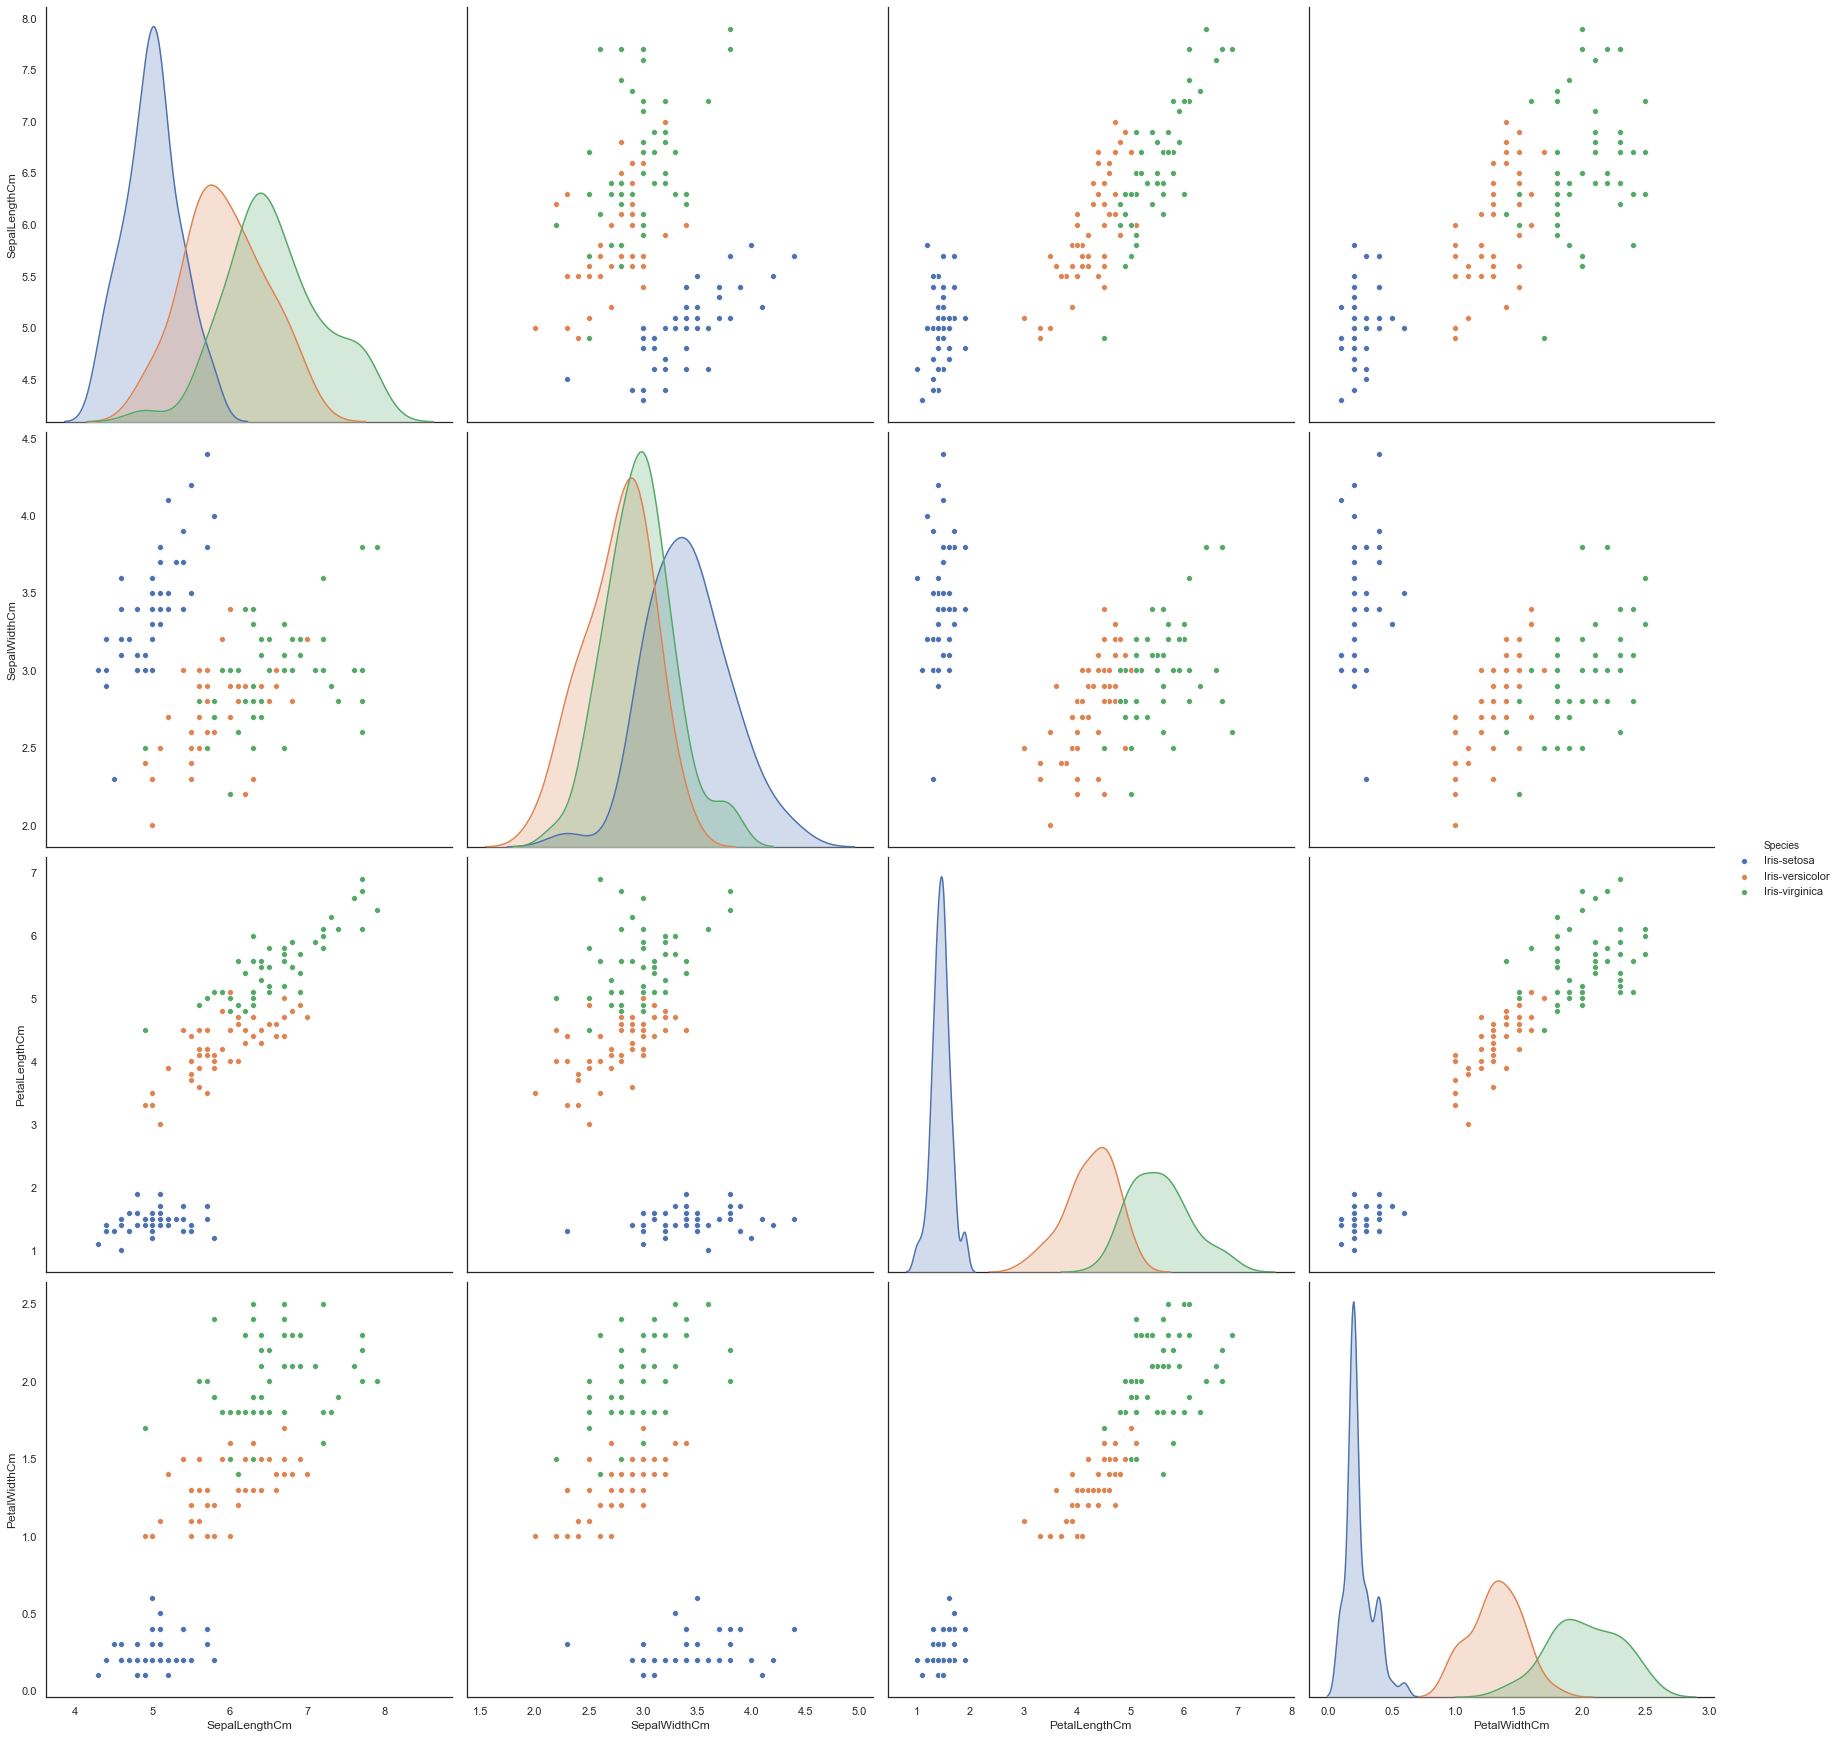

In [6]:
# pair plot
sns.pairplot(df,hue="Species",size=6)
plt.show()

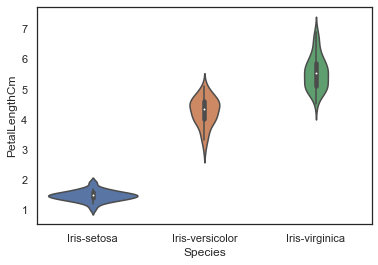

In [7]:
sns.violinplot(x="Species",y="PetalLengthCm",data= df , size =7)
plt.show()

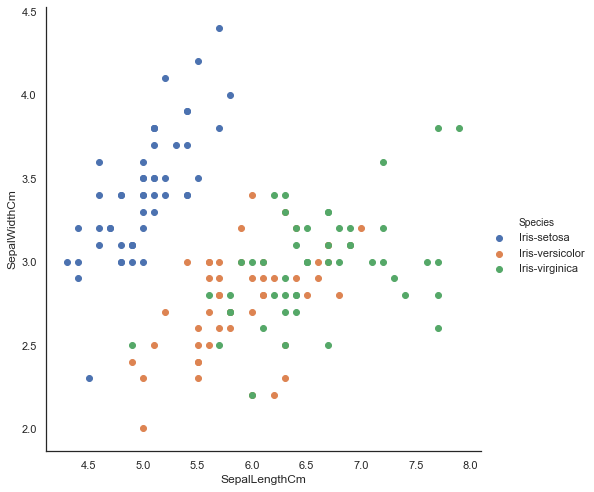

In [8]:
sns.FacetGrid(df,hue="Species",size=7).map(plt.scatter, "SepalLengthCm","SepalWidthCm").add_legend()

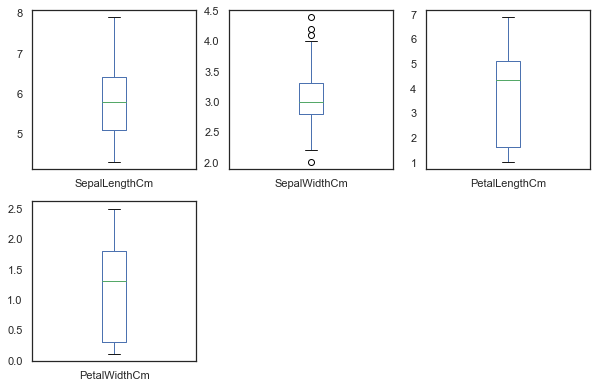

In [9]:
df.plot(kind="box", subplots=True,layout=(3,3),sharex=False,sharey=False,figsize=[10,10])
plt.show()

<h5> After seeing the box plots we found that sepalWidthcm has outlayers</h5>

In [10]:
df["SepalWidthCm"].describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64

In [11]:
IQR = df["SepalWidthCm"].quantile(0.75) - df['SepalWidthCm'].quantile(0.25)
IQR

0.5

In [12]:
upper_limit = df["SepalWidthCm"].quantile(0.75) + 1.5*IQR
lower_limit = df["SepalWidthCm"].quantile(0.25) - 1.5*IQR
print(upper_limit)
print(lower_limit)

4.05
2.05


In [13]:
outlayers = df[(df["SepalWidthCm"]>=upper_limit)  |  (df["SepalWidthCm"]<=lower_limit)]
outlayers

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [14]:
df["SepalWidthCm"][15,32,33,60] = df["SepalWidthCm"].quantile(0.95)

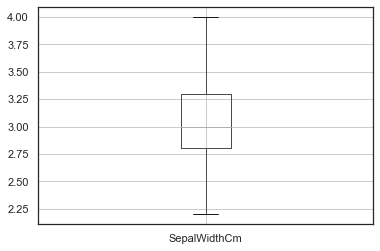

In [15]:
df.boxplot(column=["SepalWidthCm"])
plt.show()

<h6>Splitting the data into independent x and dependent y variables</h6>

In [16]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}).copy()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state =7)

In [19]:
from sklearn.tree import DecisionTreeClassifier

<h5>implementing the machine learning  Decision tree Classifier algorithm</h5>

In [20]:
dtree = DecisionTreeClassifier(criterion="gini",random_state=7)
dtree = dtree.fit(x_train,y_train)
print("Decision Tree Classifier Created")

Decision Tree Classifier Created


In [21]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

<h5>Visualize Decision Trees using Graphviz<h5>

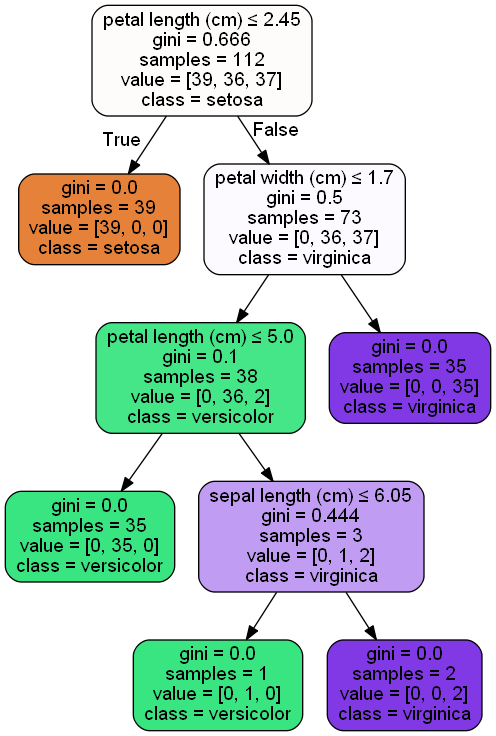

In [22]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=fn,class_names=cn,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [23]:
dt_pred = dtree.predict(x_test)
dt_pred

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0], dtype=int64)

In [24]:
dt_accuracy = metrics.accuracy_score(y_test,dt_pred)
dt_accuracy

0.9210526315789473

In [25]:
cm = metrics.confusion_matrix(y_test,dt_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  2],
       [ 0,  1, 12]], dtype=int64)

In [26]:
cr = classification_report(y_test, dt_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      0.86      0.89        14
           2       0.86      0.92      0.89        13

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38

